<center>
    <h1> ILI286 - Computación Científica II </h1>
    <h2> Tarea 5 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
    <h2> José Miguel Rebolledo Johnson </h2>
    <h3> 201173583-8   -   201173583-8 </h3>
</center>

_Marzo 2017_

# Tabla de Contenidos
* [1.- Objetivos](#obj)
* [2.- Uso de widgets](#widgets)
* [3.- Ecuación de calor en 2D](#heateq)
* [4.- Aplicación de la ecuación de calor en imágenes](#heateq-image)
* [5.- Otra aplicación de la ecuación de calor](#revheateq-image)
* [6.- Instrucciones](#instr)

<div id='obj' />
# 1. Objetivos

Los objetivos de esta tarea son:

* Estudio de las técnicas basadas en diferencias finitas.
* Aplicación de diferencias finitas en un problema con 3 dimensiones (2 espaciales y 1 temporal).
* Resolución de la ecuación de calor y aplicación en el procesamiento de imágenes.

<div id='widgets' />
# 2. Uso de widgets

A continuación se muestra un ejemplo de como utilizar los <i>widgets</i>.

In [1]:
# Libraries
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from scipy.misc import factorial
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from PIL import Image, ImageTk 

<div id='heateq' />
# 3. Ecuación de calor en 2D (30 pts)

Considere la siguiente ecuación diferencial parcial, correspondiente a la ecuación de calor definida en un dominio $(x,y) \in [0,10]^2$ y $0 < t < T_{\max}$:

\begin{align}
u_t &= \alpha\, \Delta u \\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1) \\
u(x,y,0) = f(x,y) &= \dfrac{x\,y\,(x-10)\,(y-10)}{x+3}, \quad (x,y) \in [0,10]^2
\end{align}

donde $u(\Gamma, t)$ es la función $u$ evaluada en la frontera $\Gamma$ del dominio y $\dfrac{\partial u}{\partial \mathbf{n}}$ es el gradiente de $u$ producto punto el vector normal $\mathbf{n}$ apuntando hacia fuera del dominio.

1. Aplique diferencias finitas en la <i>PDE</i> y expréselo en términos de los índices $i,j,k$ al aplicar un esquema explícito, donde $i$ está relacionado con la discretización de la variable $x$, $j$ está relacionado con la variable $y$ y $k$ está relacionado con el tiempo $t$.

2. Determine el tipo de condición de frontera del problema. Explique como utilizar esta condición y la condición inicial para resolver numéricamente el problema. Además indique qué significa que $c = 0$ y $c = 1$.

3. Construya el código para resolver el problema. Aplique operaciones vectorizadas. Tenga en consideración los problemas de estabilidad que podrían surgir de los valores de $\Delta x, \Delta y, \Delta t$. Considere $\alpha = 1$ y un $T_\max = 5$.

4. Su solución debería ser un "cubo" de tamaño $(N_x, N_y, N_t)$. Muestre gráficamente mediante <i>widgets</i> con 2 <i>slides</i> la solución encontrada (donde el primer <i>slide</i> modifica el momento $t$ visualizado y el segundo <i>slide</i> modifica el coeficiente $c$ de la condición). Use un gráfico 3D para visualizar la forma de la solución.

## Desarrollo

1.- Usando un sistema explícito o "<i>Hacia adelante</i>", se procede a escribir las aproximaciones a usar:

\begin{align}
\\
u_{x} = \frac{ w_{i+1,j,k} - w_{i,j,k}}{\Delta x} \\
\\
u_{y} = \frac{ w_{i,j+1,k} - w_{i,j,k}}{\Delta y} \\
\\
u_{xx} = \frac{ w_{i+1,j,k} - 2w_{i,j,k} + w_{i-1,j,k}}{{\Delta x}^2} \\
\\
u_{yy} = \frac{ w_{i,j+1,k} - 2w_{i,j,k} + w_{i,j-1,k}}{{\Delta y}^2} \\
\\
u_{t} = \frac{ w_{i,j,k+1} - w_{i,j,k}}{\Delta t} \\
\\
\end{align}

La primera ecuación quedaría:

\begin{align}
\\
\frac{ w_{i,j,k+1} - w_{i,j,k}}{\Delta t} = \alpha \left(\frac{ w_{i+1,j,k} - 2w_{i,j,k} + w_{i-1,j,k}}{{\Delta x}^2} + \frac{ w_{i,j+1,k} - 2w_{i,j,k} + w_{i,j-1,k}}{{\Delta y}^2}\right)
\\
\\
\end{align}


Despejando $w_{i,j,k+1}$ y usando $\Delta x = \Delta y = \Delta h$ y haciendo $\frac{\alpha \Delta t}{\Delta h^2} = \sigma$


\begin{align}
\\
w_{i,j,k+1} = \sigma w_{i+1,j,k}  + \sigma w_{i,j+1,k} + (1 - 4\sigma) w_{i,j,k} + \sigma w_{i-1,j,k} + \sigma w_{i,j-1,k}  \hspace{1cm} (1)
\\
\\
\end{align}

Si escribimos $u(\Gamma, t)$ como $w_{i,j,k}$ (teniendo en cuenta que los valores de $i$ y $j$ son los valores frontera), la segunda ecuación quedaría:

\begin{align}
\\
u(\Gamma, t) = w_{i,j,k} = \frac{(c-1)}{c \Delta h}(w_{i+1,j,k} - w_{i,j,k}) \hspace{1cm} (2)
\\
\\
u(\Gamma, t) = w_{i,j,k} = \frac{(c-1)}{c \Delta h}(w_{i,j+1,k} - w_{i,j,k}) \hspace{1cm} (3)
\\
\end{align}

Llamaremos $\beta$ al valor de $\frac{(c-1)}{c \Delta h}$. Usando los vectores normales a las 4 fronteras como **(1,0) , (0,1) , (0,-1) , (-1,0)** quedan 4 ecuaciones para determinar las fronteras en cualquier instante de tiempo:

\begin{align}
\\
\end{align}

**Frontera izquierda (0,y):**

\begin{align}
\\
w_{0,j,k} = \frac{\beta}{\beta - 1}(w_{1,j,k}) \hspace{1cm} (4)
\\
\\
\end{align}
**Frontera derecha (10,y):**

\begin{align}
\\
w_{N_{x},j,k} = \frac{\beta + 1}{\beta}(w_{N_{x}-1,j,k}) \hspace{1cm} (5)
\\
\\
\end{align}
**Frontera inferior (x,0):**

\begin{align}
\\
w_{i,0,k} = \frac{\beta}{\beta-1}(w_{i,1,k}) \hspace{1cm} (6)
\\
\\
\end{align}
**Frontera superior (x,10):**

\begin{align}
\\
w_{i,N_{y},k} = \frac{\beta + 1}{\beta}(w_{i,N_{y}-1,k}) \hspace{1cm} (7)
\\
\\
\end{align}

2.- La condición para las fronteras espaciales corresponden a una condición de *Robin*. Usando la ecuación *1* se puede obtener cualquier punto que no sea parte de la frontera en el tiempo siguiente, en palabras matemáticas significa que podemos obtener cualquier $W_{i,j,k+1}$ con$\hspace{0.3cm} i \neq 0,N_{x}\hspace{0.1cm}, \hspace{0.3cm} j \neq 0,N_{y}$. Para obtener las fronteras se utilizará la condición de frontera de *Robin* expresadas matemáticamente en las ecuaciones *4,5,6* y *7*, apoyado por los puntos internos obtenidos con la ecuación *1*. Al unir estos dos resultados se tendrá todos los puntos $W_{i,j,k}$ en un tiempo siguiente. Para comenzar a obtener aproximaciones se partirá por usar la ecuación $f(x,y,0)$ para obtener las temperaturas iniciales en cualquier parte del espacio en *t=0* y luego usar lo mencionado antes para obtener las aproximaciones en los tiempos siguientes.

Tener un $c=0$ significa que las fronteras serán más simples de determinar. Las fronteras quedarían dicatadas por las igualdades $W_{i+1,j,k} = W_{i,j,k}$ y $W_{i,j+1,k} = W_{i,j,k}$. Si $c=1$ las fronteras quedarán más simples aún, teniendo temperatura $W_{i,j,k} = 0$ en todo momento k en la frontera en *x* e *y*.


3.- Antes de generar un código para resolver este problema es necesario mencionar que para conseguir que el método sea estable por el uso de *Forward Difference* se debe cumplir la siguiente inecuación matemática:

\begin{align}
\\
\frac{\alpha \Delta t}{min(\Delta x^2,\Delta y^2)} < \frac{1}{2}
\\
\\
\end{align}
En el caso de este laboratorio se utilizará siempre el valor $\Delta x^2 = \Delta y^2 = \Delta h^2 = 1$, y con $\alpha = 1$ debemos cumplir con un $\Delta t < \frac{1}{2}$.
Ahora se procederá a generar un código para resolver este problema:

In [2]:
def f(x,y):
    arriba = x*y*(x-10.0)*(y-10.0)
    abajo = x+3
    return arriba/abajo
Nx=11
def Resolver(Nx,Ny,imagen,alpha,c,dt,Tmax):
    resultado = np.zeros((int(Tmax/dt)+1,Nx,Ny))
    if(alpha*dt >= 0.5):
        print("No es estable el metodo al usar el dt elegido")
    if(alpha*dt < 0.5):
        #Valores iniciales
        sigma = alpha*dt
        beta = (c-1)/c
        TIni = np.zeros((Nx, Ny))
        TSig = np.zeros((Nx, Ny))
        TAux = np.zeros((Nx, Ny))
        if(type(imagen) is int):
            #Temperaturas iniciales
            for i in range (Nx):
                for j in range (Ny):
                    TIni[i][j] = f(i,j)
        else:
            TIni = imagen
        resultado[0]=TIni.copy()
        #Temperaturas en un tiempo t
        for t in range (1,int(Tmax/dt)+1):
            #Puntos internos
            for i in range (1,Nx-1):
                for j in range (1,Ny-1):
                    TSig[i][j]=sigma*TIni[i+1][j]+sigma*TIni[i][j+1]+(1-4*sigma)*TIni[i][j]+sigma*TIni[i-1][j]+sigma*TIni[i][j-1]
            #Frontera
            for i in range (Nx):
                for j in range (Ny):
                    if(i == 0 and j!=(Ny-1) and j!=0):
                        TSig[i][j] = (beta/(beta-1))*TSig[i+1][j]
                    elif(i == (Nx-1) and j!=(Ny-1) and j!=0):
                        TSig[i][j] = ((beta+1)/beta)*TSig[i-1][j]
                    elif(j == 0 and i!=(Nx-1) and i!=0):
                        TSig[i][j] = (beta/(beta-1))*TSig[i][j+1]
                    elif(j == (Ny-1) and i!=(Nx-1) and i!=0):
                        TSig[i][j] = ((beta+1)/beta)*TSig[i][j-1]
            #Esquinas
            TSig[0][0] = (beta/(beta-1))*TSig[1][0]
            TSig[Nx-1][0] = (beta/(beta-1))*TSig[Nx-1][1]
            TSig[0][Ny-1] = ((beta+1)/beta)*TSig[0][Ny-2]
            TSig[Nx-1][Ny-1] = ((beta+1)/beta)*TSig[Nx-2][Ny-1]
            
            TIni = TSig.copy()
            resultado[t]=TSig.copy()
        return resultado
        
    else:
        print("Error")




from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


def interactuar(c,Tiempo):
    z = Resolver(11,11,0,1,c,0.25,5)[int(Tiempo*4)]
    Y = [0,1,2,3,4,5,6,7,8,9,10]
    X = [0,1,2,3,4,5,6,7,8,9,10]
    x,y = np.meshgrid(X,Y)
    fig = plt.figure(figsize=(12,9))
    ax = fig.gca(projection='3d')
    ax.set_xlim([0,10])
    ax.set_ylim([0,10])
    ax.set_zlim([0,100])
    surf = ax.plot_surface(x,y,z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    plt.show()



dt = 0.25
dc = 0.01
widgets.interact(interactuar,c=(0+dc,1-dc,dc),Tiempo=(0,5,dt))



<function __main__.interactuar>

4.- Es notable que con valores medianos de C, como *0.59*, la temperatura en general tiende a acercarse lo que inicialmente era la temperatura en las fronteras, la parte central era la más caliente pero con el pasar del tiempo va disminuyendo para alcanzar valores cercanos a los de la frontera. Las fronteras tienden a quedarse en valores bajos y constantes. 

Con valores de C pequeños, como *0.05*, se observa que las fronteras tienden a alcanzar las temperaturas que exisen en un principio en el centro del espacio, caso contrario a lo que se explicó primero. Las frotneras cambian mucho acercandose a las temperaturas altas del centro del espacio mientras que el centro se mantiene constante.

Con valores muy altos de C, como *0.85*, los valores de las temperaturas comienzas a tergiversarse desde la frontera derecha y los datos se vuelven poco legibles.

<div id='heateq-image' />
# 4. Aplicación de la ecuación de calor en imágenes: <i> Blurring </i> (40 pts)

La ecuación de calor logra una difusión, en base a las condiciones entregadas. Aplicado en imágenes logramos un efecto de <i> blur </i> en la imagen. Consideremos el siguiente problema:

\begin{align}
    u_t &= \alpha\,\Delta u \\
    u(x,y,0) &= I(x,y) \\
    c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

donde $I(x,y)$ es una imagen. Consideremos $\alpha = 1$ por simplicidad.

1. Cargue la imagen <i>mandrill.png</i> (adjunta en esta tarea) como escala de grises, normalice sus valores (respecto a la escala de grises) y transfórmela a un <i>array</i> de <i>Numpy</i>. Visualice la imagen y su dimensión.

2. Programe una función que resuelva la ecuación de calor propuesta. Para este punto es importante considerar algunos aspectos:
    * La ecuación se resuelve sobre un dominio, y sobre este dominio debemos aplicar valores $\Delta x, \Delta y$ que se estimen convenientes. Para este problema el dominio es entregado por la imagen, por lo que tenemos cierta "flexibilidad" para escogerlo. Si la dimensión de la imagen es $(N,M)$ entonces pueden tomarse, convenientemente, el dominio espacial como $[0,N-1]\times[0,M-1]$ y con esto tomar $(N,M)$ puntos equiespaciados por $\Delta x = 1, \Delta y = 1$. Es decir estamos tomando como cada punto de la "discretización" como un píxel de la imagen.
    * Recuerde que la imagen representa su función de condición inicial. Dado lo explicado anteriormente, si generamos $N$ y $M$ puntos y denotamos la imagen por $I(x,y)$, tenemos que $I(x_i,y_j)$ equivale al píxel $(i,j)$ (recordar que estamos tomando $\Delta x = 1, \Delta y = 1$.
    * Tenga en consideración los valores necesarios para que el problema sea estable.
    * El efecto de blur es progresivo. Considerando que $t$ está acotado por $0 < t \leq T_\max$, esto quiere decir que mientras más grande sea $T_\max$, más tiempo se está entregando para que la imagen se vea afectada por el efecto de <i>blur</i>. Para visualizar esto considere $T_\max = 30$.

4. Aplique su código a la imagen. Luego de obtener la solución utilize un <i> widget </i> con dos <i>slides</i>: el primero para visualizar la imagen en cada tiempo obtenido y el segundo variando el parámetro $c \in (0,1)$. ¿Se consigue el efecto de <i> blur </i> en la imagen?.

5. Explique el efecto del parámetro $c$ en la imagen. ¿cuál es el $c$ óptimo para obtener un buen efecto de <i>blur</i>?.

## Desarrollo ##

1.-

Dimesiones: 512 x 512 pixeles
Imagen original:


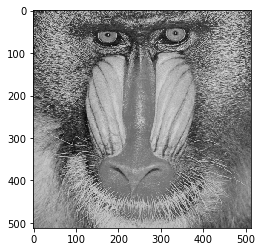

In [4]:
img = Image.open("mandrill.png").convert('L')
pix = np.array(img)
print("Dimesiones: "+str(len(pix)) +" x "+str(len(pix[0]))+" pixeles")
print("Imagen original:")
%matplotlib inline
a =plt.imshow(pix, cmap='gray', interpolation='nearest', vmin=0, vmax=255)

2.- Es notable remarcar que para que sea estable este método debemos cumplir con la inecuación de estabilidad presentada antes en la sección *1*. Es por eso que se continua usando $\Delta t = 0.25$. A continuación se presenta el código para generar el Blurring.

In [5]:
dt = 0.25
Tmax = 20
print("Comenzando blurring con dt = "+str(dt)+" y Tiempo máximo = "+str(Tmax))
print("Espere...")
final1 = Resolver(512,512,pix,1,0.1,dt,Tmax)
print("Espere mas...")
final2 = Resolver(512,512,pix,1,0.4,dt,Tmax)
print("Espere un poco mas...")
final3 = Resolver(512,512,pix,1,0.7,dt,Tmax)
print("BLURRING TERMINADO")

Comenzando blurring con dt = 0.25 y Tiempo máximo = 20
Espere...
Espere mas...
Espere un poco mas...
BLURRING TERMINADO


<function __main__.interactuar2>

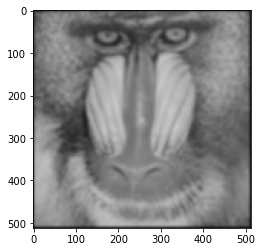

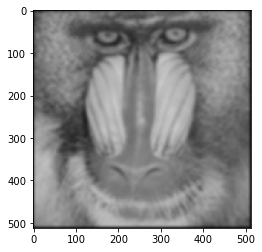

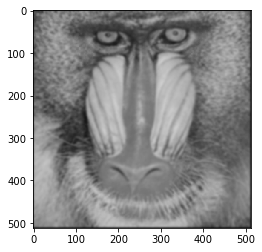

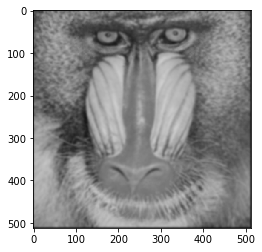

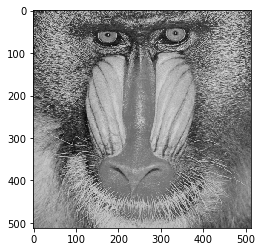

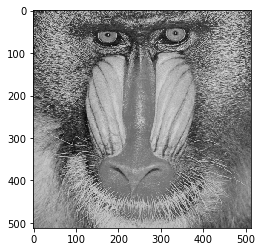

In [6]:
def interactuar2(Tiempo,c):
    if(c==0.1):
        plt.imshow(final1[int(Tiempo*4)], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    elif(c==0.4):
        plt.imshow(final2[int(Tiempo*4)], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    elif(c==0.7):
        plt.imshow(final3[int(Tiempo*4)], cmap='gray', interpolation='nearest', vmin=0, vmax=255)


dt = 0.25
dc=0.3
widgets.interact(interactuar2,Tiempo=(0,15,dt),c=(0.1,0.7,dc))


3 .- Para este ejercicio se aplicó un tiempo máximo $T_{máx} = 20$ para optimizar el tiempo de ejecución. Se observa que el efecto blurring se consigue de gran manera difuminando la imagen al pasar el tiempo con el *widget*. Al cambiar C de valores pequeños a valores altos se nota que los bordes se tornan negros, en palabras más gráficas, la foto comienza a *"desintegrarse"* desde las fronteras.

4.- El efecto de C no es muy notorio, o no cambia mucho la calidad del efecto *blurring*, entonces se podrpia decir que el efecto blurring se consigue con muchos valores de C. Gracias a lo que se explicó en la sección anterior *(1)* sobre el comportamiento de las temperaturas al variar C y gracias a lo que se observa en este ejercicio, se eligió *C = 0.6* como óptimo.

<div id='revheateq-image' />
# 5. Otra aplicación de la ecuación de calor: <i> Deblur </i> (30 pts)

En la sección anterior pudo aplicar la ecuación de calor a una imagen. **¿Será este proceso reversible?**. Dicho de otra manera, si tengo una imagen con <i>blur</i>, ¿puedo recuperar la imagen original?. Este problema se plantea de la siguiente manera:

\begin{align}
u_t &= \alpha\, \Delta u\\
u(x,y,\tau) &= I_\tau(x,y)\\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

donde $I_\tau(x,y)$ es la imagen procesada o con efecto <i>blur</i>. Esto es un problema de valor final --- recuerde
que nosotros hemos trabajado problemas de valor incial. En este contexto, tenemos que $\tau$ es el tiempo en cuestión (tiempo hasta donde avanzó la ecuación de calor). Entonces estamos buscando la condición incial $I(x,y)$ que me lleva a $I_\tau(x,y)$. Este problema puede reducirse a la siguiente <i>PDE</i>:

\begin{align}
u_t &= -\widetilde{\alpha}\,\Delta u\\
u(x,y,0) &= I_\tau(x,y)\\
c\cdot u(\Gamma, t) + (1-c)\cdot\dfrac{\partial u}{\partial \mathbf{n}}(\Gamma,t) &= 0, \quad t > 0, c \in (0,1)
\end{align}

Esto es posible en cierta medida, para saltos pequeños de tiempo. Es decir, **¡debemos retroceder el tiempo!**

1. Carge la imagen adjunta llamada <b>blurred.tiff</b> y visualícela utilizando la función adjunta en esta sección. Indique que significa el histograma que entrega.

2. Construya un código para resolver numéricamente este problema. En esta parte, la imagen adjunta será la condición inicial. Considere $\widetilde{\alpha} = 1$ en la segunda PDE o equivalentemente $\alpha=-1$ en la primera PDE. Considere el valor de $c$ óptimo, considerando lo obtenido en la sección anterior. Además considere $\tau = 30$ (o $T_\max = 30$ usando la notación de los problemas anteriores).

3. Resuelva el problema y visualícelo utilizando un <i> widget </i> con 2 <i>slides</i>: el primero para variar el tiempo visualizado y el segundo para variar el parámetro $\Delta t$. Utilice la función adjunta para visualizar la imagen y el histograma. ¿Se puede revertir el efecto en la imagen?, ¿qué ocurre después de harto tiempo?, ¿Qué ocurre con la distribución (entragada por el histograma) a medida que avanza el tiempo?, ¿podemos utilizar esto de alguna manera?, ¿qué puede concluir respecto al efecto de $\Delta t$ sobre el algoritmo?. Varíe $\Delta t \in (0.1, 5)$.

## Desarrollo ##

A continuación, la función adjunta para mostrar la imagen y su histograma.

Dimesiones: 383 x 506 pixeles


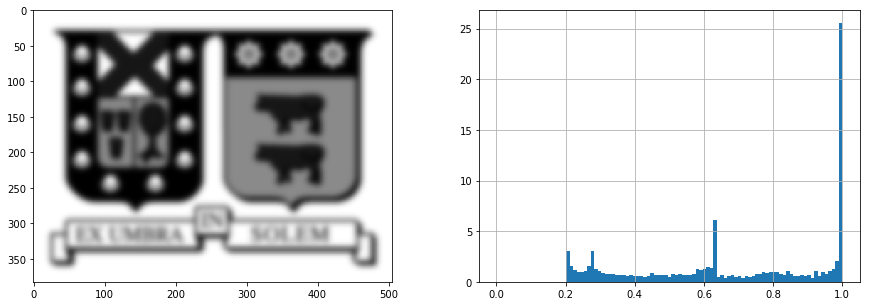

In [7]:
#Carga imagen
img2 = Image.open("blurred.tiff")
pix2 = np.array(img2)
print("Dimesiones: "+str(len(pix2)) +" x "+str(len(pix2[0]))+" pixeles")
%matplotlib inline


# Función auxiliar para mostrar la imagen y el histograma. Los parámetros k y dt son entregados por el slide.
#  im: imagen a mostrar.
def show_imhist(im):
    plt.figure(figsize=(15,5))    
    plt.subplot(1,2,1)
    # Mostrar imagen en tiempo k
    plt.imshow(im, cmap='gray')
    
    # Mostrar histograma
    plt.subplot(1,2,2)
    bins=np.linspace(0,1,100)
    plt.hist(im.flatten() ,bins=bins, normed=True)
    plt.grid(True)
    
    plt.show()

show_imhist(pix2)

1.- Se carga la imagen *blurred.tiff* y se muestra el logo de la unviersidad difuminado. La imagen representada matricialmente contiene coeficientes entre *0* y *1*, donde *0* representa el color más negro, y el valor *1* representa la mayor ausencia de negro, o color blanco. El histograma muestra cuanta cantidad de cada color existe en la imagen, por ejemplo; del primer valor *0.2*, existen aproximadamente *3* pixeles que tienen ese valor en la imagen. El valor que más se repite es el *1.0* que representa el color blanco y es posible ver en la imagen que el color blanco predomina ya que es casi todo el borde de la imagen.

2.- A continuación se presenta el código para resolver el problema presentado. Cabe destacar que se usará un $T_{máx}$ de *10* ya que luego de esa cifra la imagen comienza a tener un comportamiento constante que es poco informativo y además optimizará el tiempo de ejecución. Como se ecojió antes, se usará un C = 0.6.

In [ ]:
dt = 0.25
Tmax = 10
print("Comenzando deblurring con dt = "+str(dt)+" y Tiempo máximo = "+str(Tmax))
print("Espere...")
usm1 = Resolver(383,506,pix2,-1,0.6,0.1,Tmax)
usm2 = Resolver(383,506,pix2,-1,0.6,0.2,Tmax)
usm3 = Resolver(383,506,pix2,-1,0.6,0.25,Tmax)
print("DEBLURRING TERMINADO")

Comenzando deblurring con dt = 0.25 y Tiempo máximo = 10
Espere...


In [ ]:
def interactuar2(Tiempo,dt):
    if(dt==0.1):
        #plt.imshow(usm1[int(Tiempo*10)], cmap='gray')
        show_imhist(usm1[int(Tiempo*10)])
    elif(dt==0.2):
        #plt.imshow(usm2[int(Tiempo*5)], cmap='gray')
        show_imhist(usm2[int(Tiempo*5)])
    elif(dt==0.25):
        #plt.imshow(usm2[int(Tiempo*4)], cmap='gray')
        show_imhist(usm3[int(Tiempo*4)])



dtt=0.1
widgets.interact(interactuar2,Tiempo=(0,10,dtt),dt=(0.1,0.25,dtt))

3.-

**¿Se puede revertir el efecto de la foto?, ¿Qué ocurre después de harto tiempo?**

Vemos que no es posible revertir el efecto de la foto conforme se aumenta el tiempo. La imagen solo toma otras tonalidades convergiendo a un solo color constante, en este caso es plomo. Este comportamiento convergente a un valor constante en todo el espacio lo observamos en la representación gráfica de la primera aplicación que se hizo en este laboratorio, donde con *C = 0.58* se observaba que las temperaturas convergian a una temperatura constante cercana a las temperaturas iniciales de las fronteras.

**¿Qué ocurre con la distribución (entragada por el histograma) a medida que avanza el tiempo?, ¿Podemos utilizar esto de alguna manera?**

Al principio hay muchos colores con pequeñas cantidades, pero conforme pasa el tiempo se observa que la cantidad de colores presente en la imagen van disminuyendo pero estos colores estan presentes en la mayor cantidad de los pixeles de la imagen, en general se comienza a homogeneizar los valores de la imagen convergiendo todos los pixeles a un mismo color. Esto se puede utilizar para confirmar desde otra persectiva lo que se observó en la primera parte donde se planteó que conforme pasa el tiempo las temperaturas tienden a ser iguales en todo el espacio buscando una temperatura general.

**¿Qué puede concluir respecto al efecto de $\Delta t$ sobre el algoritmo?**

Mientras más pequeño sea el $\Delta t$ más rápido se homogeiniza la imagen buscando un mismo color para todos los pixeles, mientras mayor sea el $\Delta t$, más lento se consigue este valor constante plomo. Esto quiere decir en nuestro algoritmo que el calor se difunde mejor cuando se eligen pequeños pasos de tiempo.

# Conclusiones #

Se puede observar gracias a los 3 experimentos de este laboratorio que el objetivo de la ecuación de calor es modelar el comportamiento de la difusión de calor en algun material y que este material está definido por $\alpha$, que sería una especia de constante de difusión térmica y podríamos decir que para nuestro laboratorio usamos algún especia de material con difusión térmica igual a 1 (por ejemplo la del oro es $0.000127$). También se observó que C es una constante que indica un porcentaje de incidencia que sienten las fronteras en cuanto a sus temperatuaras vecinas, mientras mayor era el C la frontera obtenía menos calor de sus puntos espaciales vecinos, pero mientras menor era el C, más calor obtenian las fronteras desde sus puntos vecinos. Fue muy provechoso aplicar este comportamiento a imagenes para atterizar más aun lo aprendido en clases y en el principio de este laboratorio. Por ultimo se puede destacar que se aprendió más sobre manejo de matrices y manejo de imagenes en Python.

# Referencias #

* Dropbox material del curso
* http://effbot.org/imagingbook/pil-index.htm